In [29]:
import pickle
import numpy as np
import pandas as pd

In [30]:
import os

# Data import #

In [31]:
dir = os.getcwd()

In [32]:
with open(dir+"\\data\\X.pkl","rb") as f:
    X = pickle.load(f)

with open(dir+"\\data\\y.pkl","rb") as f:
    y_series = pickle.load(f)

In [33]:
#X丢弃Date
X = X.drop(['Date'],axis=1)
#y_series变成DataFrame
y = pd.DataFrame(y_series)


In [34]:
X

,neutral,positive,negative,vader_score,comment_num,Open,High,Low,Close,Volume,Close_EWMA3,Close_EWMA7,Close_EWMA14,Close_EWMA30,Close
0,0.702078,0.153399,0.144523,0.103267,867,27.847500,27.860001,26.837500,27.332500,212818400.0,27.332500,27.332500,27.332500,27.332500,26.562500
1,0.722395,0.138788,0.138817,0.146491,1147,27.072500,27.162500,26.352501,26.562500,257142000.0,26.947500,27.140000,27.229833,27.282823,26.565001
2,0.697031,0.187037,0.115931,0.193284,1190,26.635000,26.857500,26.157499,26.565001,263188400.0,26.756251,26.996250,27.141189,27.236512,26.937500
3,0.711032,0.173487,0.115481,0.141675,1094,26.799999,27.049999,26.674999,26.937500,160423600.0,26.846875,26.981563,27.114030,27.217220,27.972500
4,0.682993,0.213791,0.103216,0.168840,1495,27.307501,28.037500,27.174999,27.972500,237458000.0,27.409688,27.229297,27.228493,27.265948,28.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.725867,0.179823,0.094310,0.230191,837,56.437500,56.709999,55.630001,55.959999,127997200.0,55.985649,55.843619,55.464729,54.075820,54.470001
930,0.727418,0.144143,0.128439,0.164178,880,55.537498,55.737499,54.317501,54.470001,148780400.0,55.227825,55.500215,55.332098,54.101251,54.560001
931,0.687263,0.141239,0.171498,0.192002,815,54.447498,55.462502,54.279999,54.560001,126286800.0,54.893913,55.265161,55.229152,54.130847,54.592499
932,0.728763,0.145672,0.125565,0.241396,693,54.625000,54.904999,53.825001,54.592499,108495200.0,54.743206,55.096996,55.144265,54.160631,55.007500


In [35]:
#分割数据集
tarin_percentage, dev_percentage, test_percentage = 0.7, 0.15, 0.15
X = X[:len(X)//5]
y = y[:len(y)//5]
X_train, X_dev, X_test = X.iloc[:int(len(X)*tarin_percentage)], X.iloc[int(len(X)*tarin_percentage):int(len(X)*(tarin_percentage+dev_percentage))], X.iloc[int(len(X)*(tarin_percentage+dev_percentage)):]
y_train, y_dev, y_test = y.iloc[:int(len(y)*tarin_percentage)], y.iloc[int(len(y)*tarin_percentage):int(len(y)*(tarin_percentage+dev_percentage))], y.iloc[int(len(y)*(tarin_percentage+dev_percentage)):]


In [36]:
X_train

,neutral,positive,negative,vader_score,comment_num,Open,High,Low,Close,Volume,Close_EWMA3,Close_EWMA7,Close_EWMA14,Close_EWMA30,Close
0,0.702078,0.153399,0.144523,0.103267,867,27.847500,27.860001,26.837500,27.332500,212818400.0,27.332500,27.332500,27.332500,27.332500,26.562500
1,0.722395,0.138788,0.138817,0.146491,1147,27.072500,27.162500,26.352501,26.562500,257142000.0,26.947500,27.140000,27.229833,27.282823,26.565001
2,0.697031,0.187037,0.115931,0.193284,1190,26.635000,26.857500,26.157499,26.565001,263188400.0,26.756251,26.996250,27.141189,27.236512,26.937500
3,0.711032,0.173487,0.115481,0.141675,1094,26.799999,27.049999,26.674999,26.937500,160423600.0,26.846875,26.981563,27.114030,27.217220,27.972500
4,0.682993,0.213791,0.103216,0.168840,1495,27.307501,28.037500,27.174999,27.972500,237458000.0,27.409688,27.229297,27.228493,27.265948,28.002501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.691837,0.188972,0.119190,0.133987,530,31.235001,31.557501,31.212500,31.500000,112241600.0,31.534949,31.578004,31.694051,31.857894,30.642500
126,0.634860,0.170892,0.194248,0.092244,979,31.120001,31.160000,30.635000,30.642500,243046400.0,31.060612,31.314971,31.522465,31.753204,30.017500
127,0.620766,0.139977,0.239257,0.043135,1559,30.962500,31.014999,29.805000,30.017500,314380000.0,30.539056,30.990603,31.321803,31.641223,30.820000
128,0.687277,0.171727,0.140996,0.080029,1419,30.485001,30.962500,30.302500,30.820000,245418000.0,30.679528,30.947952,31.254896,31.588241,31.415001


In [37]:
# features_base = ["Open","High","Low","Close","Volume","Close_EWMA3","Close_EWMA7","Close_EWMA14","Close_EWMA30"]
# features_vader = ['Open', 'High', 'Low', 'Close','vader_score', 'Volume', 'Close_EWMA3', 'Close_EWMA7', 'Close_EWMA14', 'Close_EWMA30',"comment_num"]
# features_finbert = ['Open', 'High', 'Low', 'Close','neutral', 'positive', 'negative', 'Volume', 'Close_EWMA3', 'Close_EWMA7', 'Close_EWMA14', 'Close_EWMA30',"comment_num"]


features_base = ["Open","High","Low","Close","Volume","Close_EWMA3","Close_EWMA7","Close_EWMA14","Close_EWMA30"]
features_vader = ['Open', 'High', 'Low', 'Close','vader_score', 'Volume', 'Close_EWMA3', 'Close_EWMA7', 'Close_EWMA14', 'Close_EWMA30']
features_finbert = ['Open', 'High', 'Low', 'Close','neutral', 'positive', 'negative', 'Volume', 'Close_EWMA3', 'Close_EWMA7', 'Close_EWMA14', 'Close_EWMA30']

In [38]:
X_base_train = X_train[features_base]
X_vader_train = X_train[features_vader]
X_finbert_train = X_train[features_finbert]
X_base_dev = X_dev[features_base]
X_vader_dev = X_dev[features_vader]
X_finbert_dev = X_dev[features_finbert]
X_base_test = X_test[features_base]
X_vader_test = X_test[features_vader]
X_finbert_test = X_test[features_finbert]


In [39]:
from sklearn.preprocessing import StandardScaler


scaler_y = StandardScaler()
sc_y = scaler_y.fit(y_train)
y_train = sc_y.transform(y_train)
y_dev = sc_y.transform(y_dev)
y_test = sc_y.transform(y_test)
y_test_raw = sc_y.inverse_transform(y_test)

In [40]:
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.callbacks import EarlyStopping



# LSTM Model #

In [41]:
def train_model_lstm(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(layers.LSTM(250, 
                          activation='tanh',
                          # kernal_initializer=tf.keras.initializers.GlorotNormal(),
                           input_shape=(X_train.shape[1], 1), return_sequences=True))
                        #input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(layers.Dropout(0.4))
    model.add(layers.LSTM(32, return_sequences=False))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False,callbacks=[early_stop])
    return model, history

# Base Experiment #

In [42]:
#标准化

sc_X = StandardScaler()
sc_X.fit(X_base_train)
X_base_train = sc_X.transform(X_base_train)
X_base_dev = sc_X.transform(X_base_dev)
X_base_test = sc_X.transform(X_base_test)



In [43]:
adam_LSTM = keras.optimizers.Adam(learning_rate=0.0001)
base_LSTM_model, base_LSTM_history = train_model_lstm(X_base_train, y_train,'mse', adam_LSTM, 100, 128)


Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 1.1098 - val_loss: 0.1165
Epoch 2/100
1/1 [==============================] - 0s 87ms/step - loss: 1.0729 - val_loss: 0.1141
Epoch 3/100
1/1 [==============================] - 0s 75ms/step - loss: 1.0478 - val_loss: 0.1117
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 1.0021 - val_loss: 0.1095
Epoch 5/100
1/1 [==============================] - 0s 79ms/step - loss: 0.9559 - val_loss: 0.1072
Epoch 6/100
1/1 [==============================] - 0s 71ms/step - loss: 0.9478 - val_loss: 0.1051
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 0.8887 - val_loss: 0.1030
Epoch 8/100
1/1 [==============================] - 0s 74ms/step - loss: 0.8488 - val_loss: 0.1009
Epoch 9/100
1/1 [==============================] - 0s 79ms/step - loss: 0.8246 - val_loss: 0.0989
Epoch 10/100
1/1 [==============================] - 0s 67ms/step - loss: 0.7797 - val_loss: 0.0969
Epoch 11/100
1/1 [===

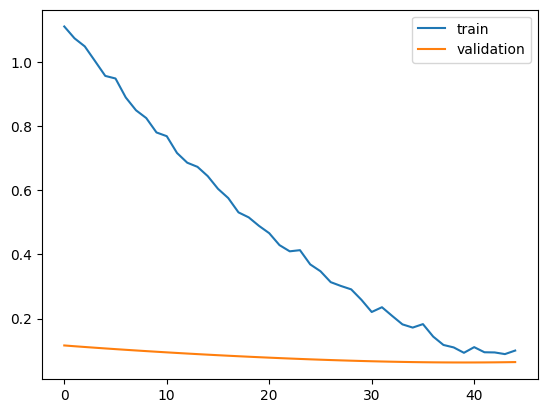

In [44]:
import matplotlib.pyplot as plt
plt.plot(base_LSTM_history.history['loss'], label='train')
plt.plot(base_LSTM_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step
MSE:  0.784947724646898
MAE:  0.6306285667419435
R2:  -0.17729725756906123


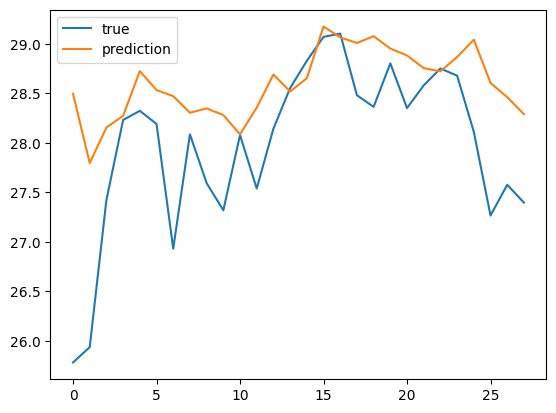

In [45]:
y_pred_base_LSTM = base_LSTM_model.predict(X_base_test)
y_pred_base_LSTM = sc_y.inverse_transform(y_pred_base_LSTM)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("MSE: ", mean_squared_error(y_test_raw, y_pred_base_LSTM))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_base_LSTM))
print("R2: ", r2_score(y_test_raw, y_pred_base_LSTM))

plt.plot(y_test_raw, label='true')
plt.plot(y_pred_base_LSTM, label='prediction')
plt.legend()
plt.show()

## VADER ##

In [46]:
#标准化

sc_X = StandardScaler()
sc_X.fit(X_vader_train)
X_vader_train = sc_X.transform(X_vader_train)
X_vader_dev = sc_X.transform(X_vader_dev)
X_vader_test = sc_X.transform(X_vader_test)


adam_LSTM = keras.optimizers.Adam(learning_rate=0.0001)
vader_LSTM_model, vader_LSTM_history = train_model_lstm(X_vader_train, y_train,'mse', adam_LSTM, 100, 32)



Epoch 1/100
4/4 [==============================] - 6s 325ms/step - loss: 1.1948 - val_loss: 0.1202
Epoch 2/100
4/4 [==============================] - 0s 56ms/step - loss: 1.1184 - val_loss: 0.1156
Epoch 3/100
4/4 [==============================] - 0s 55ms/step - loss: 1.0246 - val_loss: 0.1113
Epoch 4/100
4/4 [==============================] - 0s 53ms/step - loss: 0.9793 - val_loss: 0.1070
Epoch 5/100
4/4 [==============================] - 0s 50ms/step - loss: 0.8846 - val_loss: 0.1028
Epoch 6/100
4/4 [==============================] - 0s 49ms/step - loss: 0.8377 - val_loss: 0.0986
Epoch 7/100
4/4 [==============================] - 0s 50ms/step - loss: 0.7788 - val_loss: 0.0945
Epoch 8/100
4/4 [==============================] - 0s 44ms/step - loss: 0.7085 - val_loss: 0.0904
Epoch 9/100
4/4 [==============================] - 0s 46ms/step - loss: 0.6438 - val_loss: 0.0863
Epoch 10/100
4/4 [==============================] - 0s 44ms/step - loss: 0.5702 - val_loss: 0.0823
Epoch 11/100
4/4 [

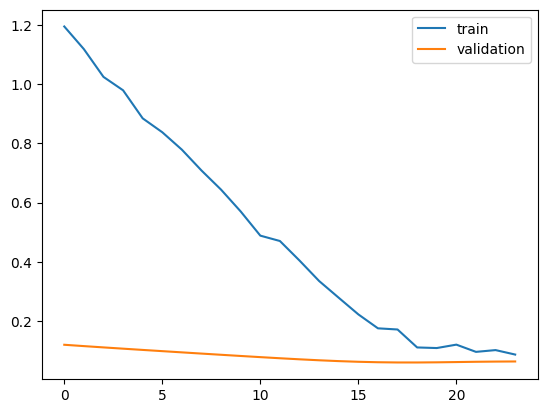

In [47]:

plt.plot(vader_LSTM_history.history['loss'], label='train')
plt.plot(vader_LSTM_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step
MSE:  0.48464235028764124
MAE:  0.5111478690708704
R2:  0.27311323801578047


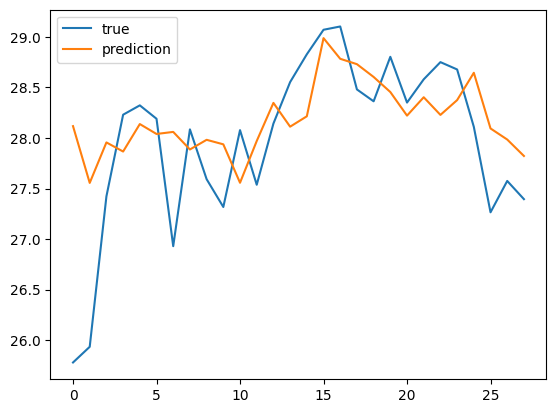

In [48]:
y_pred_vader_LSTM = vader_LSTM_model.predict(X_vader_test)
y_pred_vader_LSTM = sc_y.inverse_transform(y_pred_vader_LSTM)
# y_test = sc_y.inverse_transform(y_test)


print("MSE: ", mean_squared_error(y_test_raw, y_pred_vader_LSTM))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_vader_LSTM))
print("R2: ", r2_score(y_test_raw, y_pred_vader_LSTM))

plt.plot(y_test_raw, label='true')
plt.plot(y_pred_vader_LSTM, label='prediction')
plt.legend()
plt.show()

## FinBert ##

In [49]:
#标准化

sc_X = StandardScaler()
sc_X.fit(X_finbert_train)
X_finbert_train = sc_X.transform(X_finbert_train)
X_finbert_dev = sc_X.transform(X_finbert_dev)
X_finbert_test = sc_X.transform(X_finbert_test)


adam_LSTM = keras.optimizers.Adam(learning_rate=0.0001)
finbert_LSTM_model, finbert_LSTM_history = train_model_lstm(X_finbert_train, y_train,'mse', adam_LSTM, 100, 128)



Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 1.1469 - val_loss: 0.1190
Epoch 2/100
1/1 [==============================] - 0s 109ms/step - loss: 1.1049 - val_loss: 0.1170
Epoch 3/100
1/1 [==============================] - 0s 148ms/step - loss: 1.0979 - val_loss: 0.1152
Epoch 4/100
1/1 [==============================] - 0s 128ms/step - loss: 1.0643 - val_loss: 0.1134
Epoch 5/100
1/1 [==============================] - 0s 133ms/step - loss: 1.0148 - val_loss: 0.1117
Epoch 6/100
1/1 [==============================] - 0s 129ms/step - loss: 0.9830 - val_loss: 0.1100
Epoch 7/100
1/1 [==============================] - 0s 127ms/step - loss: 0.9430 - val_loss: 0.1083
Epoch 8/100
1/1 [==============================] - 0s 121ms/step - loss: 0.9205 - val_loss: 0.1066
Epoch 9/100
1/1 [==============================] - 0s 117ms/step - loss: 0.8780 - val_loss: 0.1050
Epoch 10/100
1/1 [==============================] - 0s 121ms/step - loss: 0.8621 - val_loss: 0.1034
Epoch 11/100

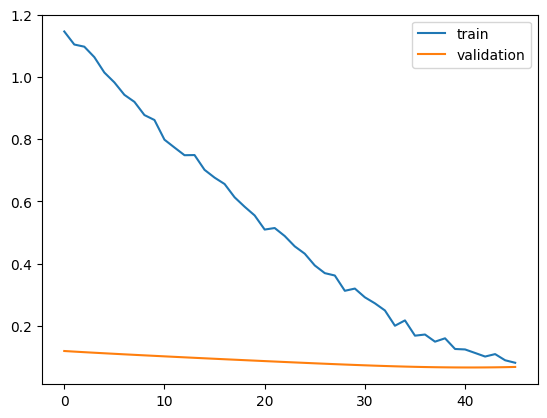

In [50]:

plt.plot(finbert_LSTM_history.history['loss'], label='train')
plt.plot(finbert_LSTM_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step
MSE:  0.7370872375394706
MAE:  0.5891825370396205
R2:  -0.10551410762383351


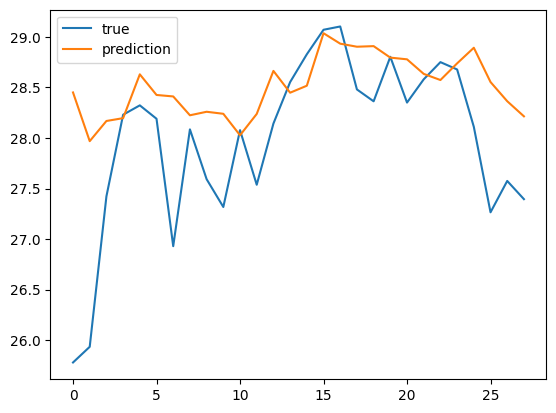

In [51]:
y_pred_finbert_LSTM = finbert_LSTM_model.predict(X_finbert_test)
y_pred_finbert_LSTM = sc_y.inverse_transform(y_pred_finbert_LSTM)
y_test = sc_y.inverse_transform(y_test)


print("MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_LSTM))
print("MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_LSTM))
print("R2: ", r2_score(y_test_raw, y_pred_finbert_LSTM))

plt.plot(y_test_raw, label='true')
plt.plot(y_pred_finbert_LSTM, label='prediction')
plt.legend()
plt.show()

## Compare ##

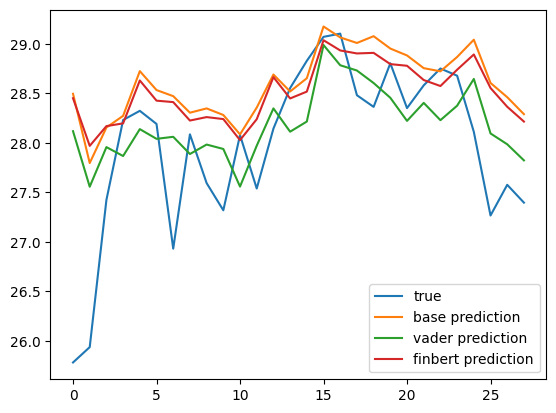

In [52]:
plt.plot(y_test_raw, label='true')
plt.plot(y_pred_base_LSTM, label='base prediction')
plt.plot(y_pred_vader_LSTM, label='vader prediction')
plt.plot(y_pred_finbert_LSTM, label='finbert prediction')

plt.legend()
plt.show()

In [53]:
#compare mse, mae, r2

print("base MSE: ", mean_squared_error(y_test_raw, y_pred_base_LSTM))
print("base MAE: ", mean_absolute_error(y_test_raw, y_pred_base_LSTM))
print("base R2: ", r2_score(y_test_raw, y_pred_base_LSTM))
print("vader MSE: ", mean_squared_error(y_test_raw, y_pred_vader_LSTM))
print("vader MAE: ", mean_absolute_error(y_test_raw, y_pred_vader_LSTM))
print("vader R2: ", r2_score(y_test_raw, y_pred_vader_LSTM))
print("finbert MSE: ", mean_squared_error(y_test_raw, y_pred_finbert_LSTM))
print("finbert MAE: ", mean_absolute_error(y_test_raw, y_pred_finbert_LSTM))
print("finbert R2: ", r2_score(y_test_raw, y_pred_finbert_LSTM))

base MSE:  0.784947724646898
base MAE:  0.6306285667419435
base R2:  -0.17729725756906123
vader MSE:  0.48464235028764124
vader MAE:  0.5111478690708704
vader R2:  0.27311323801578047
finbert MSE:  0.7370872375394706
finbert MAE:  0.5891825370396205
finbert R2:  -0.10551410762383351


In [54]:
len(y_test)

28

# RNN MOdel #

In [55]:
def train_model_lstm(X_train, y_train, loss, optimizer, epochs, batch_size):
    model = keras.Sequential()
    model.add(layers.RNN(250, 
                          activation='tanh',
                          # kernal_initializer=tf.keras.initializers.GlorotNormal(),
                           input_shape=(X_train.shape[1], 1), return_sequences=True))
                        # input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.RNN(32, return_sequences=False))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(loss=loss, optimizer=optimizer)
    early_stop = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, shuffle=False)
    return model, history